# Color Classification Algorithm

In [1]:
import warnings
from sklearn.cluster import KMeans

In [2]:
from typing import List, Tuple, Dict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from os import listdir
from os.path import isfile, join

# Imports PIL module 
from PIL import Image


In [3]:
import extcolors
from colormap import rgb2hex

In [4]:
def color_to_df(colors):
    '''input takes a list of extracted colors from colors_x function'''
    
    colors_pre_list = str(colors).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df_color = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df_color


## Color Percentage Calculator


##### This gives all colors percentage, that is used later for selection of colrs upto 90%

In [5]:
def top_90pc_colors(df_color):
    
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    percentage_list = [str(round(p*100/sum(list_precent),1)) for p in list_precent]
    #print("percentage_list: ", percentage_list)
    sum_of_pc = 0
    top_90pc_colors = []
    for num in percentage_list:
        if sum_of_pc <= 90.0:
            sum_of_pc = sum_of_pc+ float(num)
            top_90pc_colors.append(num)
        else:
            pass
    
    #print("top_90pc_colors: ", top_90pc_colors)

    required_num_colors=len(top_90pc_colors)
    hex_colors_list=list_color[:required_num_colors]
    
    return hex_colors_list

### MAIN FUNCTION

In [6]:
### get_colors(image_path, tolerance = 12, limit = 10)
def get_colors(image_path, tolerance, limit):
    
    
    colors_x = extcolors.extract_from_path(image_path, tolerance, limit)
    #print("colors_x: ", colors_x)
    
    df_color = color_to_df(colors_x)
    
    #print(df_color)
    
    hex_colors_list = top_90pc_colors(df_color)
    
    if len(hex_colors_list)==0: #to not return empty value
        hex_colors_list.append("#000000")  #append black as default color
    else:
        pass
    
    print("hex_colors_list: ", hex_colors_list)
    return hex_colors_list
    

### Checking Functions & Plotting Colors For One Sample

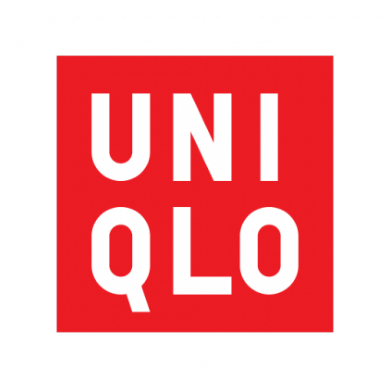

In [19]:
images_path="./images/"
onlyfiles = [f for f in listdir(images_path) if isfile(join(images_path, f))]

#print(onlyfiles)

image_path="./images/"+onlyfiles[70]
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
hex_colors_list = get_colors(image_path, tolerance = 12, limit = 10)

hex_colors_list:  ['#EC1C24', '#FFFFFF', '#000000']


### Plotting

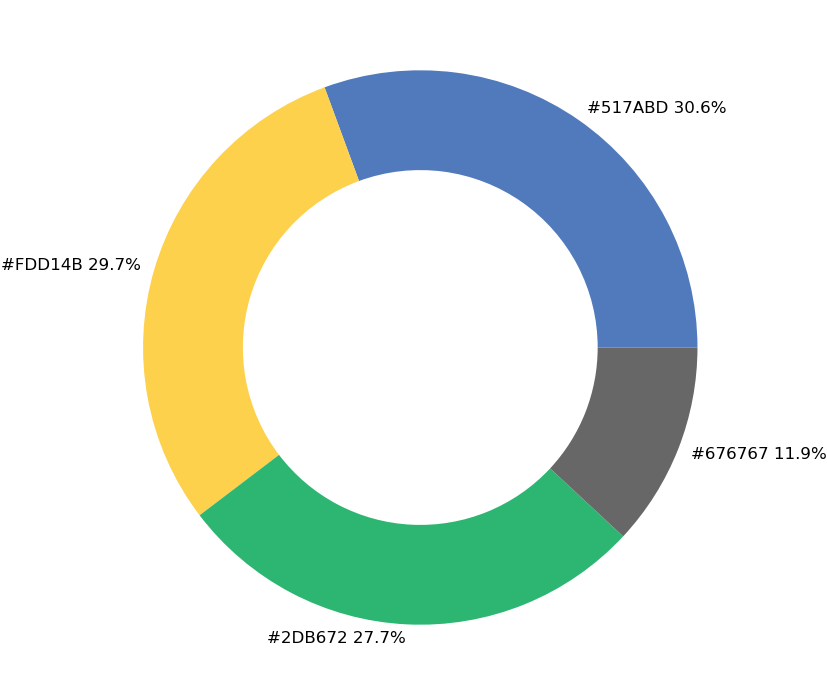

In [9]:
colors_x = extcolors.extract_from_path(image_path, tolerance=12, limit=12)
df_color = color_to_df(colors_x)

df_color = df_color[:len(hex_colors_list)]
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

### Color Classification from Excel file

In [10]:
color_class_list =[
('#000000','black'),
('#FFFFFF', 'white'),
('#ffed3c', 'yellow_light'),
('#fcd12e','yellow_dark'),
('#eeaa25','orange_light'),
('#e17921','orange_dark'),
('#d63424','red_light'),
('#cc3221','red_light'),
('#b42c1f','red_dark'),
('#90233e','red_dark'),
('#d53b8a','pink_light'),
('#b8348d','pink_dark'),
('#9d2c78','pink_dark'),
('#461f66','violett'),
('#0e2f65','blue_dark'),
('#1e4e93','blue_dark'),
('#2e6eb7','blue'),
('#4498d7','blue_light'),
('#50aee9','blue_light'),
('#51aac9','blue_light'),
('#50a6a2','green_light'),
('#4ea177','green'),
('#4c9e49','green'),
('#72b33f','green'),
('#e4e031','green_light'),
('#866a5c','brown'),
('#999999','grey_light'),
('#5b5b5b', 'grey_dark')]

In [11]:
def classifyColors(colors: List[str], classes: Tuple[str,str]) -> Dict[str,str]:
    '''input: hex_colors_list, color_class_list(hex, class_name)'''
    '''return : dict of color classification''' 

    classes = dict(classes)
    classes = zip(classes.values(), classes.keys())
    classes = dict(classes)

    def color2ints(color):
        color = '000000' + color[1:]
        color = color[-6:]
        color = color[0:2], color[2:4], color[4:6]
        color = tuple(map(lambda e: int(e, base= 16), color))
        return color

    def distanceBetween(c1, c2):
        c1 = color2ints(c1)
        c2 = color2ints(c2)
        return sum(map(
            lambda e: (e[0] - e[1]) ** 2, 
            zip(c1,c2)
        ))
    
    def classify(color):
        return min(classes, key= lambda e: distanceBetween(classes[e],color))
    
    #return {color: classify(color) for color in colors}
    final_list=[]
    counter=0
    for color in colors:
        counter=counter+1
        final_dict = {f"hex_code_{counter}": color, f"color_class_{counter}" : classify(color)}
        final_list.append(final_dict)
    return final_list


In [12]:
classifyColors(hex_colors_list,color_class_list)

[{'hex_code_1': '#517ABD', 'color_class_1': 'blue'},
 {'hex_code_2': '#FDD14B', 'color_class_2': 'yellow_dark'},
 {'hex_code_3': '#2DB672', 'color_class_3': 'green'},
 {'hex_code_4': '#676767', 'color_class_4': 'grey_dark'}]

## LOOP TO RUN THROUGH ALL IMAGES

In [13]:
#CHANGE IMAGES FOLDER PATH
images_path="./images/"
#TOTAL NUMBER OF COLORS TO EXTRACT
num_of_colors = 10


In [14]:

all_images = [f for f in listdir(images_path) if isfile(join(images_path, f))]

#print(all_images)
print("Total images found :", len(all_images))

data=[]
counter=0
for image in all_images:
    try:
        print("Running for Image ", counter+1)
        image_path="./images/"+image

        #calling the color picking function
        colors_list = get_colors(image_path, tolerance = 12, limit=num_of_colors)
        #calling the classification function

        list_of_color_dict = classifyColors(colors_list,color_class_list)
        
        #adding image id and image name
        list_of_color_dict.append({"image_id":counter})
        list_of_color_dict.append({"image_name":image})
                                  
        # color_dict["image_id"]:counter
        # color_dict["image_name"]:image

        #print(color_dict)
        data.append(list_of_color_dict)
        
    except Exception as e:
        print("Skipping this image. An error occurred : ", e) 
    counter=counter+1

print("Total Processed Images :", len(data))

Total images found : 77
Running for Image  1
hex_colors_list:  ['#1D1D1B']
Running for Image  2
hex_colors_list:  ['#FFFFFF', '#007AC7']
Running for Image  3
hex_colors_list:  ['#FFFFFF', '#EF0000', '#CCAD08', '#BE0000', '#DDC747']
Running for Image  4
hex_colors_list:  ['#000000']
Running for Image  5
hex_colors_list:  ['#1D1D1B']
Running for Image  6
hex_colors_list:  ['#00B3EF', '#000000', '#EF3829', '#FDB913', '#002F60', '#CCCCCC']
Running for Image  7
hex_colors_list:  ['#929291', '#8150A0', '#2E7FC2', '#ED2024', '#21AE5C', '#F79E1C']
Running for Image  8
hex_colors_list:  ['#AE1C3F', '#006940', '#FFFFFF', '#671025', '#300711']
Running for Image  9
hex_colors_list:  ['#005592', '#FCE800']
Running for Image  10
hex_colors_list:  ['#A6A8AB', '#231F20', '#F9F9F9']
Running for Image  11
hex_colors_list:  ['#FFFFFF', '#78C259', '#C7C6C5']
Running for Image  12
hex_colors_list:  ['#69B012', '#C62D32', '#E68302', '#F8BB13', '#862872', '#1390D0']
Running for Image  13
hex_colors_list:  ['

# Data Pre Processing

In [15]:
#data

In [16]:
# flatten the data and extract image_id and image_name
rows = []
for image_data in data:
    hex_colors = []
    color_classes = []
    
    image_data_len = len(image_data)  #number of dict in a list, that coters different hex code numbers
    image_data_len = image_data_len - 2 # -2 because there are 2 more dict elements, image name and id
    
    for i in range(1, image_data_len + 1): #+1 to keep the index right
        hex_code_key = f"hex_code_{i}"
        color_class_key = f"color_class_{i}"
        hex_code_value = image_data[i-1].get(hex_code_key, "")
        color_class_value = image_data[i-1].get(color_class_key, "")
        if hex_code_value:
            hex_colors.append(hex_code_value)
        if color_class_value:
            color_classes.append(color_class_value)
    row = {'image_id': image_data[-2]['image_id'],
           'image_name': image_data[-1]['image_name'],
           'hex_colors': hex_colors,
           'color_classes': color_classes}
    rows.append(row)

df = pd.DataFrame(rows, columns=['image_id', 'image_name', 'hex_colors', 'color_classes'])

In [17]:
df

,image_id,image_name,hex_colors,color_classes
0,0,abs-wheels-vector-logo-400x400.png,[#1D1D1B],[black]
1,1,abta-logo-vector-download-400x400.jpg,"[#FFFFFF, #007AC7]","[white, blue]"
2,2,ac-cuneo-1905-vector-logo-400x400.png,"[#FFFFFF, #EF0000, #CCAD08, #BE0000, #DDC747]","[white, red_light, orange_light, red_light, gr..."
3,3,Adidas-Trefoil-logo-vector-for-free-download.png,[#000000],[black]
4,4,adobe-eps-vector-logo-400x400.png,[#1D1D1B],[black]
...,...,...,...,...
71,72,vespa-moto-vector-logo-400x400.png,[#312782],[violett]
72,73,volkswagen-auto-eps-vector-logo-400x400.png,"[#00509F, #FFFFFF]","[blue_dark, white]"
73,74,volvo-cars-vector-logo-400x400.png,"[#FFFFFF, #28367B, #808080, #B1B1B1]","[white, blue_dark, brown, grey_light]"
74,75,warner-bros-black-vector-logo-400x400.png,[#000000],[black]


In [18]:
df.to_csv('output_data.csv', index=False)